In [3]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import ImageFont, ImageDraw, Image

<img src=normalstandard.jpg>

In [5]:
sp.norm(78, 12).pdf(90)

0.020164227043261946

(331, 85, 3)


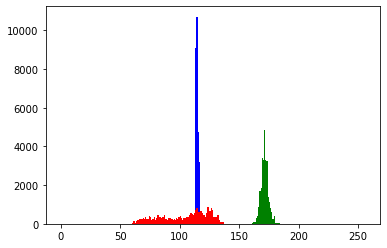

114
171
123
114.11505242580415
170.97426692731474
103.90549138084236


In [16]:
train = cv2.imread("patch3.png")
print(train.shape)

h, s, v = cv2.split(cv2.cvtColor(train, cv2.COLOR_BGR2HSV))

h1 = plt.hist(h.ravel(), 256, [0, 256], color='b'); 
s1 = plt.hist(s.ravel(), 256, [0, 256], color='g');
v1 = plt.hist(v.ravel(), 256, [0, 256], color='r');

plt.show()

mode_h = (np.where(h1[0]==np.max(h1[0])))[0][0] #최빈색상값 도출
mode_s = (np.where(s1[0]==np.max(s1[0])))[0][0]
mode_v = (np.where(v1[0]==np.max(v1[0])))[0][0]
print(mode_h)
print(mode_s)
print(mode_v)

print(np.mean(h))  #numpy 평균값 계산 np.mean()
print(np.mean(s))
print(np.mean(v))

In [17]:
t=7
p = sp.norm(0, 1).pdf((9-7)/4)
print(p)

0.3520653267642995


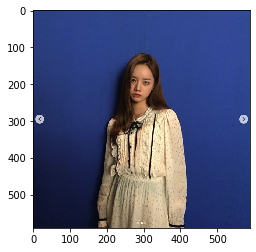

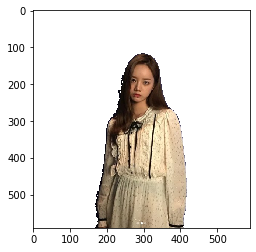

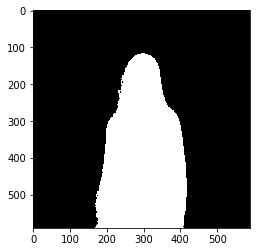

In [22]:
img = cv2.imread("hyeri.jpg")

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]

chroma = img.copy()
mask = img.copy()

min_h = mode_h - 10 # @ 값은 통계적으로 구하거나 임의로 설정 유의수준 하에 검증 확률기반 모델링
max_h = mode_h + 10

for r in range(img.shape[0]):
    for c in range(img.shape[1]):
        if h[r, c] >= min_h  and h[r, c] <= max_h:
            chroma[r ,c, :] = 255
            mask[r ,c, :] = 0           
        else:
            chroma[r ,c, :] = img[r, c, :]
            mask[r ,c, :] = 255
            
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(chroma, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()

(1080, 1920)


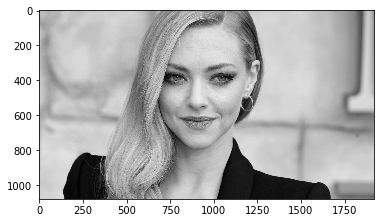

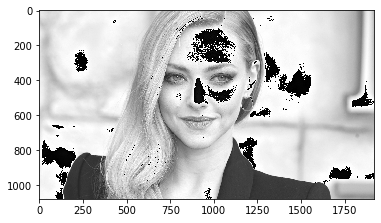

In [4]:
img = cv2.imread("./1.06/amandaseyfried.jpg", cv2.IMREAD_GRAYSCALE) #color > gray 변환
print(img.shape)
img2 = img + 40
be_af = np.hstack([img, img2])
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(img2, cmap='gray')
plt.show()

(1080, 1920)
<class 'numpy.uint8'>
<class 'numpy.int32'>


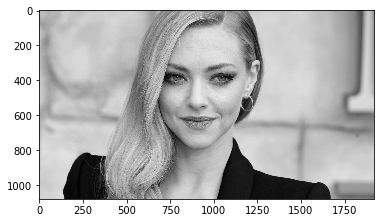

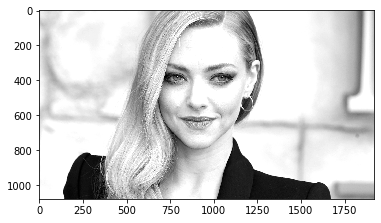

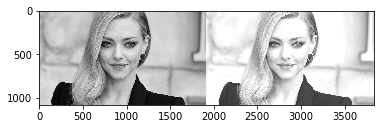

In [40]:
img = cv2.imread("./1.06/amandaseyfried.jpg", cv2.IMREAD_GRAYSCALE)
print(img.shape)

img_int = np.array(img, dtype='int') + 50
print(type(img[0,0]))
print(type(img_int[0,0]))    #정수 타입 변화 8비트 > 4바이트

img2 = np.clip(img_int, 0, 255) #np.clip() 사용으로 0~255로 범위 제한, 이상인 값 모두 255
img2 = np.array(img2, dtype='uint8') #4바이트 > 8비트 변환

be_af = np.hstack([img, img2])

plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(img2, cmap='gray')
plt.show()
plt.imshow(be_af, cmap='gray')
plt.show()

(1080, 1920)


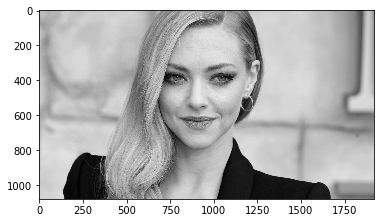

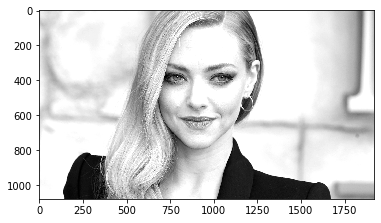

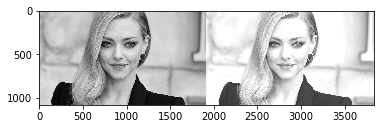

In [44]:
img = cv2.imread("./1.06/amandaseyfried.jpg", cv2.IMREAD_GRAYSCALE)
print(img.shape)

img2 = img.astype(np.int) #정수 변환 easy
img2 += 50
img2 = np.clip(img2, 0, 255).astype(np.uint8)

be_af = np.hstack([img, img2])

plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(img2, cmap='gray')
plt.show()
plt.imshow(be_af, cmap='gray')
plt.show()

In [47]:
null_trans_lut = [x for x in range(256)]
print(null_trans_lut)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [48]:
plus_lut = [x+5 for x in range(256)]
print(plus_lut)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,

In [50]:
plus_lut_clip = np.clip(plus_lut, 0, 255)
print(plus_lut_clip)

[  5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 25

In [54]:
plus_lut_inclip = [x+5 if x+5 <= 255 else 255 for x in range(256)]
print(plus_lut_inclip)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,

In [66]:
#함수화
def add_lut(op):
    result = [x+op if x+op < 255 else 255 for x in range(256)]
    result_lut = [x if x >= 0 else 0 for x in result]
    return np.array(result_lut).astype("uint8")

def mul_lut(op):
    result = [x*op if x*op < 255 else 255 for x in range(256)]
    return np.array(result).astype("uint8")

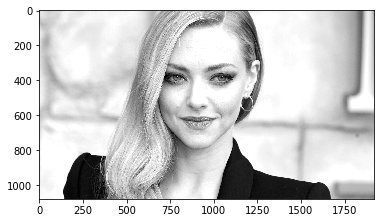

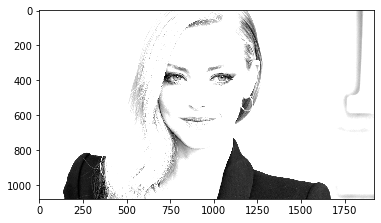

In [69]:
src2 = cv2.LUT(img, mul_lut(1.2))
plt.imshow(src2, cmap='gray')
plt.show()
src3 = cv2.LUT(img, mul_lut(2.0))
plt.imshow(src3, cmap='gray')
plt.show()

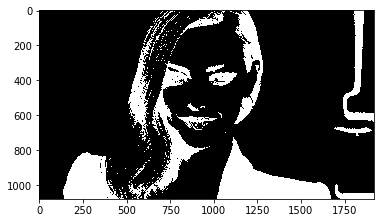

In [70]:
#이진화 LUT 적용
def binary_lut(op):
    result = [0 if x >= op else 255 for x in range(256)]
    return np.array(result).astype("uint8")

src4 = cv2.LUT(img, binary_lut(133))
plt.imshow(src4, cmap='gray')
plt.show()

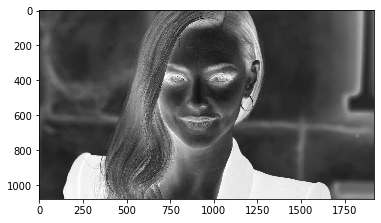

In [73]:
def inverse_lut():
    result = [255 - x for x in range(256)]
    return np.array(result).astype("uint8")

src5= cv2.LUT(img, inverse_lut())
plt.imshow(src5, cmap='gray')
plt.show()

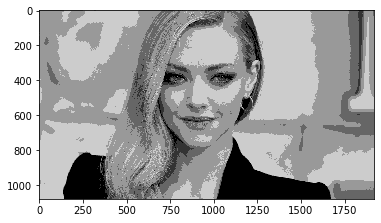

In [88]:
def posterize_lut(op):
    result = [divmod(x, op)[0] for x in range(256)]
    return np.array(result).astype("uint8")

src6= cv2.LUT(img, posterize_lut(50))
plt.imshow(src6, cmap='gray')
plt.show()

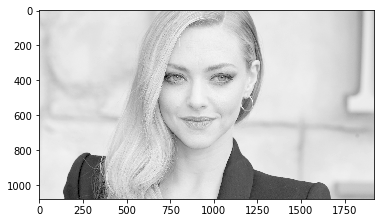

In [10]:
def gamma_lut(gamma):
    invGamma = 1.0 / gamma
    result = [((x/255.0)**invGamma)*255 for x in np.arange(0, 256)]
    return np.array(result).astype("uint8")

src7 = cv2.LUT(img, gamma_lut(2.2))
plt.imshow(src7, cmap='gray')
plt.show()

In [38]:
img_col = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
print(img_col.shape)

(1080, 1920, 3)


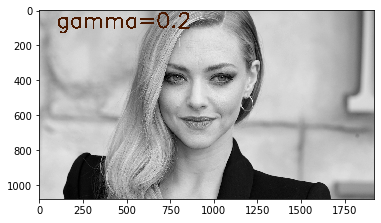

In [39]:
cv2.putText(img_col, "gamma=0.2",
            (100, 100), cv2.FONT_HERSHEY_SIMPLEX,
            4, (75, 25, 0), 10)    # 폰트 크기, 폰트 색상 RGB, 폰트 굵기
plt.imshow(img_col)

In [42]:
from PIL import Image

img = cv2.imread('AmandaSeyfried.jpg')

img_col = cv2.LUT(img, gamma_lut(0.5))
cv2.putText(img_col, "gamma=0.5", (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (75, 0, 0), 10)
cv2.imwrite("g1.jpg", img_col)

img_col2 = cv2.LUT(img, gamma_lut(1.5))
cv2.putText(img_col2, "gamma=1.5", (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (75, 0, 0), 10)
cv2.imwrite("g2.jpg", img_col2)

img_col3 = cv2.LUT(img, gamma_lut(2.5))
cv2.putText(img_col3, "gamma=2.5", (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (75, 0, 0), 10)
cv2.imwrite("g3.jpg", img_col3)

True

In [48]:
gamma = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]

for i in range(len(gamma)):
    img_col = cv2.LUT(img, gamma_lut(gamma[i]))
    img_col = cv2.putText(img_col, f"gamma={gamma[i]}", (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (75, 0, 0), 10)
    be_af = np.hstack([img, img_col])
    cv2.imwrite(f"g{i+1}.jpg", be_af)

In [49]:
in1 = Image.open("g1.jpg")
in2 = Image.open("g2.jpg")
in3 = Image.open("g3.jpg")
in4 = Image.open("g4.jpg")
in5 = Image.open("g5.jpg")
in6 = Image.open("g6.jpg")
in7 = Image.open("g7.jpg")
in8 = Image.open("g8.jpg")
in9 = Image.open("g9.jpg")
in10 = Image.open("g10.jpg")
in11 = Image.open("g11.jpg")
in12 = Image.open("g12.jpg")
in13 = Image.open("g13.jpg")
in14 = Image.open("g14.jpg")
in15 = Image.open("g15.jpg")
in16 = Image.open("g16.jpg")
in17 = Image.open("g17.jpg")
in18 = Image.open("g18.jpg")
in19 = Image.open("g19.jpg")
in20 = Image.open("g20.jpg")
in21 = Image.open("g21.jpg")


in1.save("out.gif", save_all=True, append_images=[in1, in2, in3, in4, in5, in6, in7, in8, in9, in10, in11, in12, in13, in14, in15, in16, in17, in18, in19, in20, in21], duration=100, loop=0)

In [8]:
img = cv2.imread("AmandaSeyfried.jpg")
imgPIL = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #opencv는 BGR이기 때문에 바꿔줘야 한다는걸 항상 기억

font = ImageFont.truetype("HMKMMAG.TTF", 50)          #폰트, 폰트사이즈

draw = ImageDraw.Draw(imgPIL)
draw.text((10, 10), "안녕", font=font, fill=(255, 0, 0))
imgPIL.save("out1.jpg")

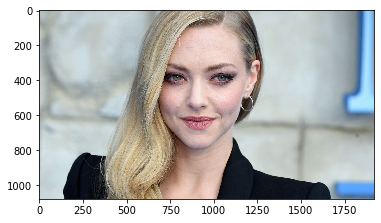

In [15]:
img = cv2.imread("AmandaSeyfried.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [22]:
k = 10
kernel = np.ones((k, k), np.float32) / (k*k)
print(kernel)

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]]


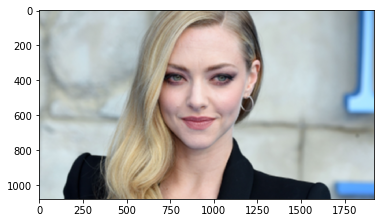

In [29]:
filtered = cv2.filter2D(img, -1, kernel)
f_image = cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB)
cv2.imwrite("filtered_image.png", filtered)
plt.imshow(f_image)
plt.show()